In [1]:
import numpy as np
# import pdb

from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
print('start')

start


In [98]:
def fisher_vector(xx, gmm):
    """Computes the Fisher vector on a set of descriptors.
    Parameters
    ----------
    xx: array_like, shape (N, D) or (D, )
        The set of descriptors
    gmm: instance of sklearn mixture.GMM object
        Gauassian mixture model of the descriptors.
    Returns
    -------
    fv: array_like, shape (K + 2 * D * K, )
        Fisher vector (derivatives with respect to the mixing weights, means
        and variances) of the given descriptors.
    Reference
    ---------
    J. Krapac, J. Verbeek, F. Jurie.  Modeling Spatial Layout with Fisher
    Vectors for Image Categorization.  In ICCV, 2011.
    http://hal.inria.fr/docs/00/61/94/03/PDF/final.r1.pdf
    """
    xx = np.atleast_2d(xx)
    N = xx.shape[0]

    # Compute posterior probabilities.
    Q = gmm.predict_proba(xx)  # NxK

    # Compute the sufficient statistics of descriptors.
    Q_sum = np.sum(Q, 0)[:, np.newaxis] / N
    Q_xx = np.dot(Q.T, xx) / N
    Q_xx_2 = np.dot(Q.T, xx ** 2) / N

    # Compute derivatives with respect to mixing weights, means and variances.
    d_pi = Q_sum.squeeze() - gmm.weights_
    d_mu = Q_xx - Q_sum * gmm.means_
    d_sigma = (
        - Q_xx_2
        - Q_sum * gmm.means_ ** 2
        + Q_sum * gmm.covariances_
        + 2 * Q_xx * gmm.means_)

    # Merge derivatives into a vector.
    return np.hstack((d_pi, d_mu.flatten(), d_sigma.flatten()))

In [99]:
# Short demo.
K = 64
N = 1000

xx, _ = make_classification(n_samples=N)
xx_tr, xx_te = xx[: -100], xx[-100: ]

gmm = GaussianMixture(n_components=K, covariance_type='diag')
gmm.fit(xx_tr)

fv = fisher_vector(xx_te, gmm)
fv


array([ 0.00298216, -0.00841597, -0.00441853, ...,  0.00401247,
       -0.04968543, -0.00942441])

In [108]:
import pandas as pd


df = pd.DataFrame({'Col1':[1, 2, 3],
                   'Col2':[4, 5, 0],
                   'Col3':[0, 0, 0]
             })
df

,Col1,Col2,Col3
0,1,4,0
1,2,5,0
2,3,0,0


In [109]:
df2 = df.sum(axis=1)==0
df2

0    False
1    False
2    False
dtype: bool

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

df = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [1.5, 1.5]])
mm = GaussianMixture(n_components=4, covariance_type='diag')
mm.fit(df)
pb = mm.predict_proba(df)
print(pb)

[[0.00000000e+000 1.44312823e-011 0.00000000e+000 1.00000000e+000]
 [9.99999996e-001 6.16943556e-012 0.00000000e+000 3.94961987e-009]
 [0.00000000e+000 1.11544719e-008 9.99999989e-001 1.67901377e-026]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 9.00702187e-052]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 1.37163254e-097]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 5.31587708e-156]
 [0.00000000e+000 4.00135976e-009 0.00000000e+000 9.99999996e-001]]


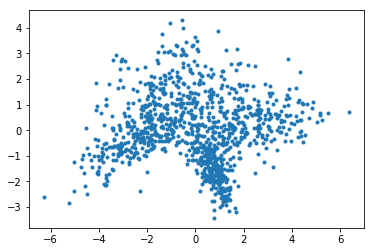

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca.fit(xx)
reduced = pca.transform(xx)
plt.plot(reduced[:, 0], reduced[:,1], '.')

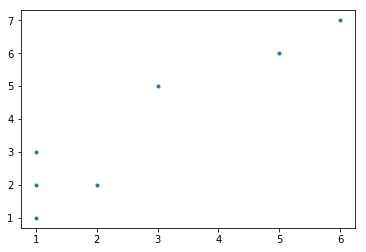

In [45]:
import pandas as pd

df = pd.DataFrame(df)
plt.plot(df[0], df[1], '.')

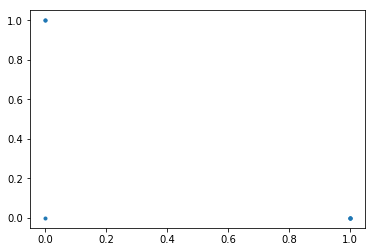

In [48]:
pb = pd.DataFrame(pb)
plt.plot(pb[0], pb[1], '.')